# Colors

# Red Green Blue

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import colorsys
import math
import random

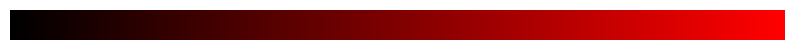

In [20]:
im = np.array([[(i, 0, 0) for i in range(256)]]*10)
plt.subplots(figsize=(10, 5))
plt.imshow(im)
plt.axis('off')
plt.show()

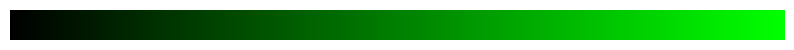

In [22]:
im = np.array([[(0, i, 0) for i in range(256)]]*10)
plt.subplots(figsize=(10, 5))
plt.imshow(im)
plt.axis('off')
plt.show()

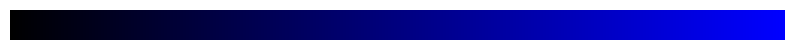

In [23]:
im = np.array([[(0, 0, i) for i in range(256)]]*10)
plt.subplots(figsize=(10, 5))
plt.imshow(im)
plt.axis('off')
plt.show()

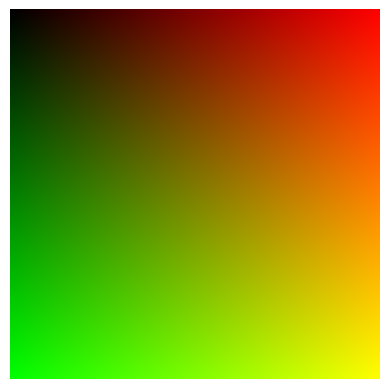

In [29]:
im = np.array([[(i, j, 0) for i in range(256)] for j in range(256)])
plt.imshow(im)
plt.axis('off')
plt.show()

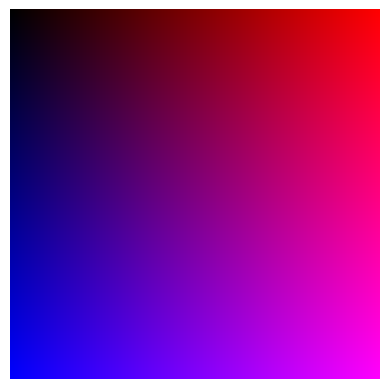

In [26]:
im = np.array([[(i, 0, j) for i in range(256)] for j in range(256)])
plt.imshow(im)
plt.axis('off')
plt.show()

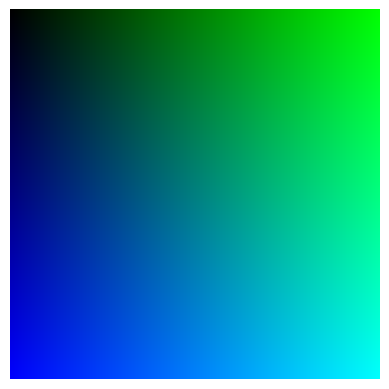

In [27]:
im = np.array([[(0, i, j) for i in range(256)] for j in range(256)])
plt.imshow(im)
plt.axis('off')
plt.show()

El color RGB debe estar en escala de 0 a 1.

In [34]:
rojo = (1, 0, 0)
colorsys.rgb_to_hls(*rojo)

(0.0, 0.5, 1.0)

In [42]:
def rgb2hsi(r, g, b):
    theta = math.acos((0.5*(r-g + r-b))/(((r-g)**2+(r-b)*(g-b))**0.5))
    h = theta if b <= g else (360 - theta)
    h /= 360
    s = 1 - (3 / (r+g+b))*min(r, g, b)
    i = (1/2)*(max(r, g, b) + min(r, g, b))
    return h, i, s

rgb2hsi(*rojo)

(0.0, 0.5, 1.0)

In [ ]:
for i in range(50):
    color = [random.random() for _ in range(3)]
    print(color)
    a = colorsys.rgb_to_hls(*color)
    b = rgb2hsi(*color)
    print(a)
    print(b)
    assert colorsys.rgb_to_hls(*color) == rgb2hsi(*color)

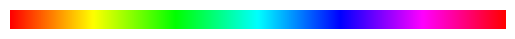

In [52]:
im = np.array([[(i/255, 0.5, 1.) for i in range(256)] for j in range(10)])
r, c, _ = im.shape
for i in range(r):
    for j in range(c):
        im[i, j] = colorsys.hls_to_rgb(*im[i, j])
plt.imshow(im)
plt.axis('off')
plt.show()

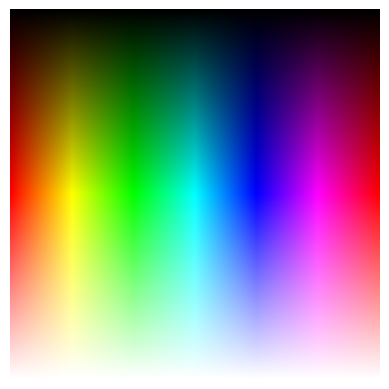

In [50]:
im = np.array([[(i/255, j/255, 1.) for i in range(256)] for j in range(256)])
r, c, _ = im.shape
for i in range(r):
    for j in range(c):
        im[i, j] = colorsys.hls_to_rgb(*im[i, j])
plt.imshow(im)
plt.axis('off')
plt.show()

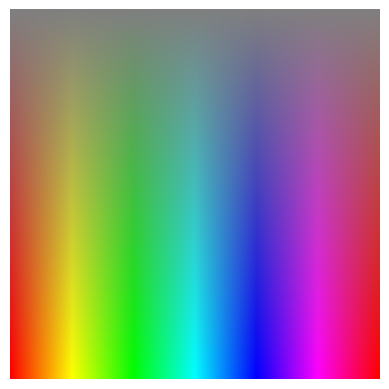

In [51]:
im = np.array([[(i/255, 0.5, j/255) for i in range(256)] for j in range(256)])
r, c, _ = im.shape
for i in range(r):
    for j in range(c):
        im[i, j] = colorsys.hls_to_rgb(*im[i, j])
plt.imshow(im)
plt.axis('off')
plt.show()

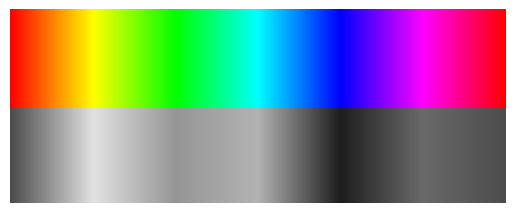

In [54]:
im = np.array([[(i/255, 0.5, 1.) for i in range(256)] for j in range(100)])
r, c, _ = im.shape
for i in range(r):
    for j in range(c):
        im[i, j] = colorsys.hls_to_rgb(*im[i, j])
        if i > 50:
            g = np.dot(im[i, j], [0.2989, 0.5870, 0.1140])
            im[i, j] = (g, g, g)
plt.imshow(im)
plt.axis('off')
plt.show()

In [71]:
color1 = np.array((241, 194, 50))/255.
color2 = np.array((138, 184, 118))/255.
color1

array([0.94509804, 0.76078431, 0.19607843])

In [72]:
color2

array([0.54117647, 0.72156863, 0.4627451 ])

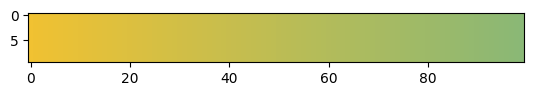

In [105]:
color1 = np.array((241, 194, 50))/255.
color2 = np.array((138, 184, 118))/255.
dif = color2 - color1
inter = np.linspace(0, 1, 100)
im = np.zeros((10, 100, 3))
for i in range(10):
    im[i, :, 0] = inter * dif[0] + color1[0]
    im[i, :, 1] = inter * dif[1] + color1[1]
    im[i, :, 2] = inter * dif[2] + color1[2]
plt.imshow(im)
plt.show()

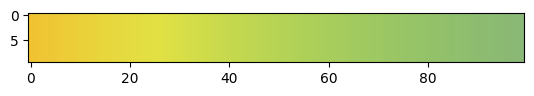

In [103]:
color1 = np.array((241, 194, 50))/255.
color2 = np.array((138, 184, 118))/255.
color1 = np.array(colorsys.rgb_to_hls(*color1))
color2 = np.array(colorsys.rgb_to_hls(*color2))
dif = color2 - color1
inter = np.linspace(0, 1, 100)
im2 = np.zeros((10, 100, 3))
for i in range(10):
    im2[i, :, 0] = inter * dif[0] + color1[0]
    im2[i, :, 1] = inter * dif[1] + color1[1]
    im2[i, :, 2] = inter * dif[2] + color1[2]
r, c, _ = im2.shape
for i in range(r):
    for j in range(c):
        im2[i, j] = colorsys.hls_to_rgb(*im2[i, j])
plt.imshow(im2)
plt.show()

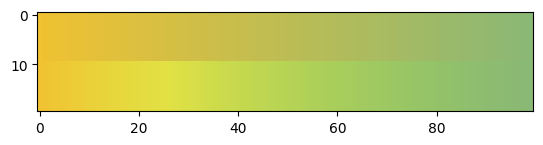

In [108]:
imf = np.concatenate((im, im2), axis=0)
plt.imshow(imf)
plt.show()

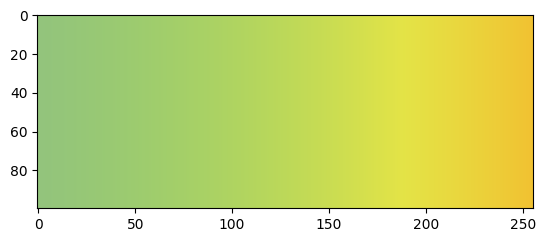

In [67]:
color1=(241/255., 194/255., 50/255.)
color2=(147/255., 196/255., 125/255.)
color1_hls=colorsys.rgb_to_hls(*color1)
color2_hls=colorsys.rgb_to_hls(*color2)
im=np.zeros((100,256,3))
for i in range(256):
  mul=i/255
  h=color1_hls[0]*mul+color2_hls[0]*(1-mul)
  l=color1_hls[1]*mul+color2_hls[1]*(1-mul)
  s=color1_hls[2]*mul+color2_hls[2]*(1-mul)
  r,g,b=colorsys.hls_to_rgb(h,l,s)
  im[:,i]=[r,g,b]
plt.imshow(im)
plt.show()